In [ ]:
# https://www.gif-vif.com/you-are-a-wizard-doggo

## Test Browser

In [3]:
#Test Browser
import requests
url = "https://www.gif-vif.com/you-are-a-wizard-doggo"
res = requests.get(url) # 取得回應
res

# 200：ok
# 4xx：User Error
# 5xx：Server Error

<Response [200]>

In [4]:
# Print all the HTML 
print(res.text)



<!DOCTYPE html>
<html lang="en">
    <head >
        <title>You are a wizard doggo, dog GIFs - Gifvif</title>
        <meta charset="utf-8" />   
        <meta name="description" content="You are a wizard doggo, dog GIFs | Search for More dog GIFs on www.GIF-VIF.com" />     
      <meta name="medium" content="image" />
      <link rel="canonical" href="https://www.gif-vif.com/you-are-a-wizard-doggo">
      <meta property="fb:app_id" content="1250511768360553">
      
      <meta property="og:site_name" content="GIFVIF">
      <meta property="og:url" content="https://www.gif-vif.com/you-are-a-wizard-doggo.gif">
      <meta property="og:title" content="You are a wizard doggo,dog GIFs">
      <meta property="og:description" content="You are a wizard doggo, Find More dog GIFs on GIF-VIF">
      <meta property="og:type" content="video.other">
      <meta property="og:image:secure_url" content="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif">
      <meta property="og:image" con

In [5]:
# beautiful soup the all HTML 
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml') # lxml是解析方式
soup

<!DOCTYPE html>
<html lang="en">
<head>
<title>You are a wizard doggo, dog GIFs - Gifvif</title>
<meta charset="utf-8"/>
<meta content="You are a wizard doggo, dog GIFs | Search for More dog GIFs on www.GIF-VIF.com" name="description"/>
<meta content="image" name="medium"/>
<link href="https://www.gif-vif.com/you-are-a-wizard-doggo" rel="canonical"/>
<meta content="1250511768360553" property="fb:app_id"/>
<meta content="GIFVIF" property="og:site_name"/>
<meta content="https://www.gif-vif.com/you-are-a-wizard-doggo.gif" property="og:url"/>
<meta content="You are a wizard doggo,dog GIFs" property="og:title"/>
<meta content="You are a wizard doggo, Find More dog GIFs on GIF-VIF" property="og:description"/>
<meta content="video.other" property="og:type"/>
<meta content="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif" property="og:image:secure_url"/>
<meta content="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif" property="og:image"/>
<meta content="image/gif" propert

In [6]:
# catch the video
vidio_elements = soup.find_all("video")
vidio_elements

[<video autoplay="" loop="" muted="" playsinline="" poster="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif">
 <source src="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.mp4" type="video/mp4"/>
 </video>,
 <video autoplay="" loop="" muted="" poster="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif">
 <source src="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.mp4" type="video/mp4"/>
 </video>]

In [7]:
# catch 0 index's poster
gif_url = vidio_elements[0].get("poster")
gif_url

'https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif'

In [8]:
# Catch again write down
gif = requests.get(gif_url)
with open("demo.gif", "wb") as f:
    f.write(gif.content)

In [15]:
# Find Next Url

# Catch div id 
# Catch div with "a" in div & href 
next_url = soup.find(id="share_and_next").find_all("a")[-1].get("href")
print(next_url)

https://www.gif-vif.com/Turtle-Vs-Beer-can


In [13]:
# <div id="share_and_next">
#     <div id="share_buttons">
#         <a href="javascript:void(0)"><img onclick="window.open(&quot;https://www.facebook.com/sharer/sharer.php?u=https://www.gif-vif.com/You-are-a-wizard-doggo/?fbrefresh=23&quot;, &quot;Post to facebook&quot;, &quot;width=600,height=400,left=200&quot;)" src="https://www.gif-vif.com/web_images/fb_share.png"></a>
#         <a href="https://pinterest.com/pin/create/button/?url=https://www.gif-vif.com/You-are-a-wizard-doggo&amp;media=https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif&amp;description=You are a wizard doggo" target="_blank"><img src="https://www.gif-vif.com/web_images/pinterest_share.png"></a>
#         <a href="https://www.reddit.com/submit?url=https://www.gif-vif.com/You-are-a-wizard-doggo/&amp;title=You are a wizard doggo" target="_blank"><img src="https://www.gif-vif.com/web_images/reddit_share.png"></a>
#     </div>
#     <a href="https://www.gif-vif.com/Turtle-Vs-Beer-can"><div id="next_div">
#         Next gif <img class="icon_align" src="https://www.gif-vif.com/web_images/next_page_icon.png">
#     </div></a>
# </div>

## web download

In [12]:
def get_gif(url):
    
    # 1. url = "https://www.gif-vif.com/you-are-a-wizard-doggo"
    title = url.split("/")[-1]
    print("getting gif",title)
    #print(f"getting gif {title}")
    res = requests.get(url) # 取得回應
    
    # 2. BeautifulSoup
    soup = BeautifulSoup(res.text, 'lxml')
    vidio_elements = soup.find_all("video")
    gif_url = vidio_elements[0].get("poster")

    # 3.Download gif
    gif = requests.get(gif_url)
    with open(f"{title}.gif", "wb") as f:
        f.write(gif.content)
    
    # 4. Next Url尋找下一個url
    next_url = soup.find(id="share_and_next").find_all("a")[-1].get("href")
    return next_url


if __name__ == "__main__":
    url = "https://www.gif-vif.com/you-are-a-wizard-doggo"
    for i in range(10):
        url = get_gif(url)

getting gif you-are-a-wizard-doggo
getting gif Turtle-Vs-Beer-can
getting gif When-sports-is-not-your-thing
getting gif Poor-guy-129
getting gif How-not-to-prank-friends
getting gif Moving-house
getting gif Crushing-CDs
getting gif When-you-want-to-go-swimming-but-water-is-too-cold
getting gif Naah-not-a-rat
getting gif Keep-petting-me


## Stock catch

In [16]:
# https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html

點選 Header，看 General 的 Request URL 及 Method 與 Response Headers 的 Content-Type 可以知道：
https://ithelp.ithome.com.tw/upload/images/20211006/20139358GVxM0ylTC2.png

- URL：https://www.twse.com.tw/exchangeReport/STOCK_DAY。
- 必要 Query：response=json&date=20211006&stockNo=2330。所以可以根據需求在 Query 的 response、date、stockNo 代入想要的值。
- HTTP Method 是 GET。
- Headers 的 Content-Type：application/json;charset=UTF-8 所以格式是 JSON，編碼為 UTF-8。
- 另外我們也知道了，不管我們 Query 的 date 是幾號，他的 server 是整個月份的日成交資訊都回給你，這點要注意一下喔！

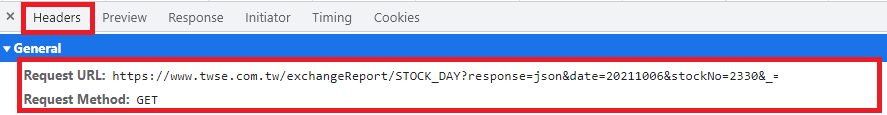

In [18]:
import requests

url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY"

# 
res = requests.get(url, params={
    "response": "json",
    "date": "20211006",
    "stockNo": "2330"
})

# 把 JSON 轉成 Python 可存取之型態
res_json = res.json()

# 我們要的每日成交資訊在 data 這個欄位
daily_price_list = res_json.get("data", [])

# 該欄位是 List 所以用 for 迴圈印出
for daily_price in daily_price_list:
    print(daily_price)

['110/10/01', '39,006,124', '22,368,447,571', '579.00', '579.00', '571.00', '574.00', '-6.00', '78,088']
['110/10/04', '22,288,138', '12,741,914,919', '574.00', '575.00', '569.00', '572.00', '-2.00', '42,147']
['110/10/05', '36,063,650', '20,406,526,124', '562.00', '572.00', '560.00', '572.00', ' 0.00', '56,678']
['110/10/06', '33,989,379', '19,345,468,774', '573.00', '574.00', '565.00', '571.00', '-1.00', '53,606']
['110/10/07', '28,480,400', '16,458,019,782', '575.00', '582.00', '572.00', '580.00', '+9.00', '23,304']
['110/10/08', '22,601,904', '13,051,944,932', '582.00', '583.00', '573.00', '575.00', '-5.00', '24,157']
['110/10/12', '27,126,088', '15,455,194,493', '570.00', '575.00', '564.00', '575.00', ' 0.00', '32,210']
['110/10/13', '19,267,437', '11,006,807,040', '572.00', '575.00', '570.00', '571.00', '-4.00', '18,050']
['110/10/14', '14,270,641', '8,213,170,376', '579.00', '579.00', '573.00', '573.00', '+2.00', '14,814']


In [ ]:
# project2
# pip install beautifulsoup4
# pip install lxml

In [22]:
from bs4 import BeautifulSoup
html = "<html>test test test</html>"
soup = BeautifulSoup(html, "lxml")
soup

<html><body><p>test test test</p></body></html>

In [23]:
from bs4 import BeautifulSoup
html = "<title>example1</title><title>example2</title>"
soup = BeautifulSoup(html, "lxml")

# find_all() 會搜尋整個 html 回傳符合的值
print(soup.find_all("title"))
# [<title>example1</title>, <title>example2</title>]

# find() 只會回傳"第一個"符合的值
print(soup.find("title"))
# <title>example1</title>

# 拿取 tag 之間的 text
print(soup.find("title").text)
# example1


[<title>example1</title>, <title>example2</title>]
<title>example1</title>
example1


根據前篇得到的資訊：

- URL：https://isin.twse.com.tw/isin/class_main.jsp。
- 必要的 Query：market=1&issuetype=1&Page=1&chklike=Y。
- 所以可以根據需求在 Query 的 market、issuetype、Page、chklike 代入自己要的值。
- HTTP Method 是 GET。
- Content-Type：text/html;charset=MS950，所以格式是 HTML，編碼為 MS950。

In [24]:
import json
import requests
from bs4 import BeautifulSoup
# index constant，數字代表我們要的資料在 list 的位置
TARGET_TABLE_INDEX = 1
STOCK_NO_INDEX = 2
STOCK_NAME_INDEX = 3
STOCK_INDUSTRY_INDEX = 6

# JSON settings
TITLE = "stock"
JSON_INDENT = 4

# HTTP Request
url = "https://isin.twse.com.tw/isin/class_main.jsp"
res = requests.get(url, params={
    "market": "1",
    "issuetype": "1",
    "Page": "1",
    "chklike": "Y"
})

# 處理編碼，使用預設 utf-8 的話 res.text 的內容會有亂碼
res.encoding = "MS950"
res_html = res.text

# Parse
soup = BeautifulSoup(res_html, "lxml")

# HTML 裡面有兩張 table
tr_list = soup.find_all("table")[TARGET_TABLE_INDEX].find_all("tr") #find_all("table") 回傳的 list length 是 2
tr_list.pop(0)  # item 是欄位名稱用不到所以 pop 掉

# 開始處理資料
result = []
for tr in tr_list:
    td_list = tr.find_all("td")
    stock_no_val = td_list[STOCK_NO_INDEX].text  #Num
    stock_name_val = td_list[STOCK_NAME_INDEX].text #Name
    stock_industry_val = td_list[STOCK_INDUSTRY_INDEX].text #Industry

    # Save to dict
    result.append({
        "stockNo": stock_no_val,
        "stockName": stock_name_val,
        "stockIndustry": stock_industry_val
    })

#Download
stock_list_dict = {TITLE: result}
with open("stock_info_list.json", "w", encoding="utf-8") as f:
    f.write(json.dumps(stock_list_dict, indent=JSON_INDENT, ensure_ascii=False))